<a href="https://colab.research.google.com/github/vedmara/project/blob/main/Project_July.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
pip install scikit_posthocs

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from scipy.stats import wilcoxon
import scipy.stats as stats
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy.stats import ttest_rel
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from scipy.stats import  ttest_rel, shapiro
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load each dataset
randomization = pd.read_csv('/content/drive/MyDrive/Project/Randomization.csv')
study_populations = pd.read_csv('/content/drive/MyDrive/Project/Study Populations.csv')
demographics = pd.read_csv('/content/drive/MyDrive/Project/Demographics.csv')
baseline_characteristics = pd.read_csv('/content/drive/MyDrive/Project/Baseline Characteristics.csv')
vital_signs = pd.read_csv('/content/drive/MyDrive/Project/Vital Signs.csv')
vas = pd.read_csv('/content/drive/MyDrive/Project/VAS Data.csv')
global_assessment=pd.read_csv('/content/drive/MyDrive/Project/Global Assessment.csv')
ae=pd.read_csv('/content/drive/MyDrive/Project/AE DATA.csv')

# Check dimensions
print("Dimensions:")
print("Randomization:", randomization.shape)
print("Study Populations:", study_populations.shape)
print("Demographics:", demographics.shape)
print("Baseline Characteristics:", baseline_characteristics.shape)
print("Vital Signs:", vital_signs.shape)


# Check for duplicates (example for one dataset)
duplicates = demographics[demographics.duplicated()]
if len(duplicates) > 0:
    print("Duplicate records found in Demographics dataset.")
else:
    print("No duplicate records found in Demographics dataset.")

Dimensions:
Randomization: (780, 3)
Study Populations: (780, 3)
Demographics: (780, 3)
Baseline Characteristics: (780, 3)
Vital Signs: (780, 9)
No duplicate records found in Demographics dataset.


In [113]:
# Merge datasets: Randomization, Study Populations, Demographics, Baseline Characteristics, Vital Signs
merged_data = pd.merge(randomization, study_populations, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, demographics, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, baseline_characteristics, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, vital_signs, on='Patient_ID', how='inner')
merged_data.columns

Index(['Patient_ID', 'Treatment', 'Center', 'ITT', 'PP', 'Age', 'Gender',
       'Work', 'Surgery_1Y', 'PR', 'Pulse rate (beats/min)', 'RR',
       'Respiratory rate (breaths/min)', 'SBP',
       'Systolic blood pressure (mmHg)', 'DBP',
       'Diastolic blood pressure (mmHg)'],
      dtype='object')

In [114]:
# Demographics Summary
demographics_summary = merged_data.groupby(['Center', 'Treatment']).agg({
    'Age': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0]
}).reset_index()

print("Demographics Summary:")
print(demographics_summary)

# Baseline Characteristics Summary
baseline_summary = merged_data.groupby(['Center', 'Treatment']).agg({
    'Work': lambda x: x.mode()[0],
    'Surgery_1Y': lambda x: x.mode()[0]
}).reset_index()

print("\nBaseline Characteristics Summary:")
print(baseline_summary)

# Vital Signs Summary
vital_summary = merged_data.groupby(['Center', 'Treatment']).agg({
    'PR': ['mean', 'std'],
    'RR': ['mean', 'std'],
    'SBP': ['mean', 'std'],
    'DBP': ['mean', 'std']
}).reset_index()

print("\nVital Signs Summary:")
print(vital_summary)

Demographics Summary:
   Center Treatment        Age              Gender
                          mean        std <lambda>
0      C1   PLACEBO  39.884058  12.985893   Female
1      C1       REF  41.000000  11.207928     Male
2      C1      TEST  35.942308  12.054474   Female
3      C2   PLACEBO  38.721311  12.248988     Male
4      C2       REF  39.163636  12.425725   Female
5      C2      TEST  41.640000  13.519395     Male
6      C3   PLACEBO  40.840000  12.092034     Male
7      C3       REF  39.657143  11.968419   Female
8      C3      TEST  38.981481  13.112706     Male
9      C4   PLACEBO  41.000000  12.216482     Male
10     C4       REF  39.925373  13.008521     Male
11     C4      TEST  37.287879  11.863020   Female

Baseline Characteristics Summary:
   Center Treatment Work Surgery_1Y
0      C1   PLACEBO   FT         NO
1      C1       REF   FT         NO
2      C1      TEST   FT         NO
3      C2   PLACEBO   FT         NO
4      C2       REF   FT         NO
5      C2    

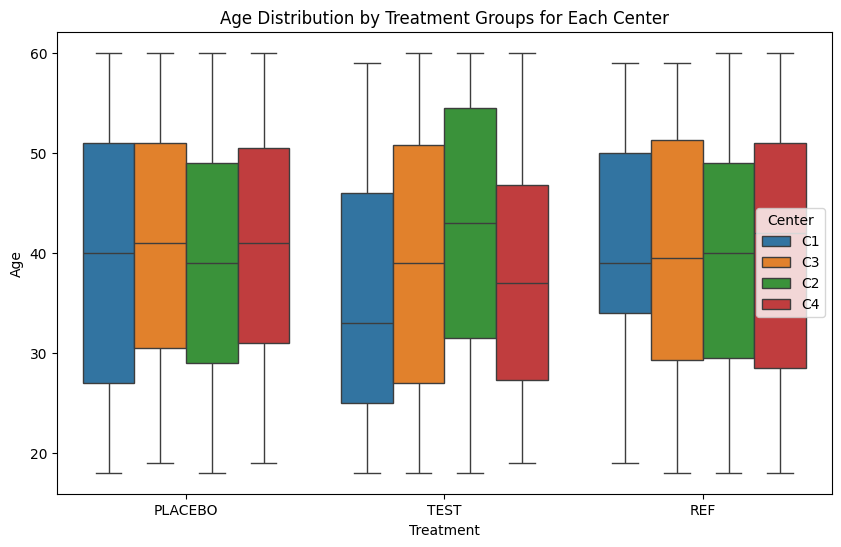

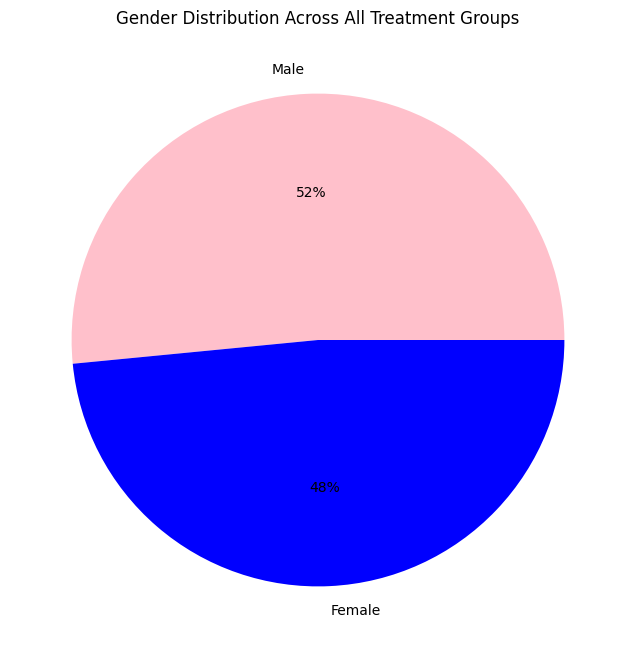

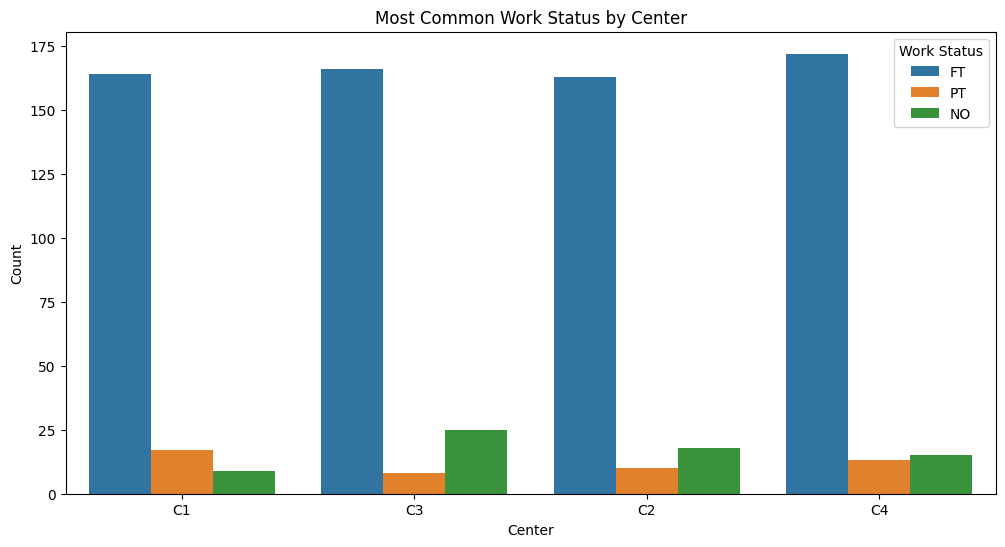

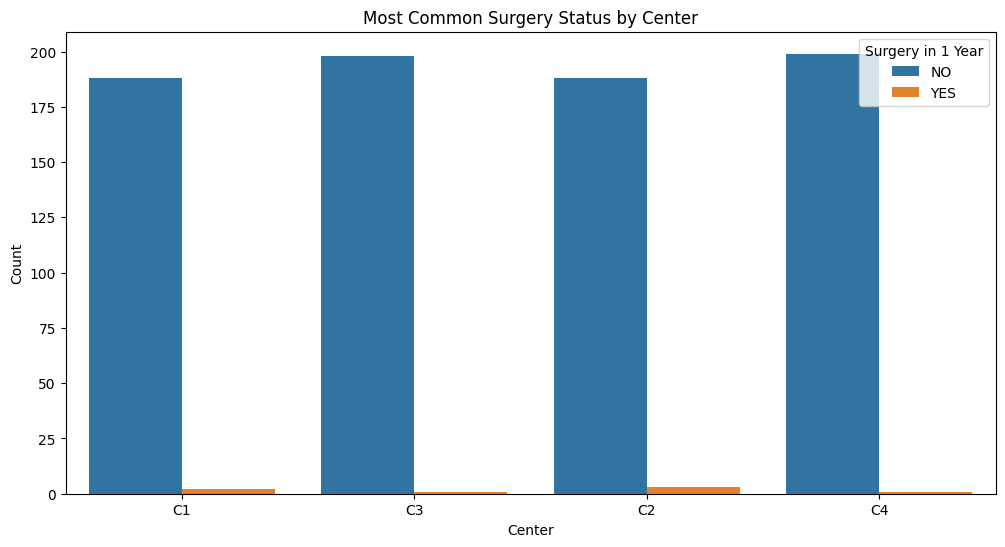

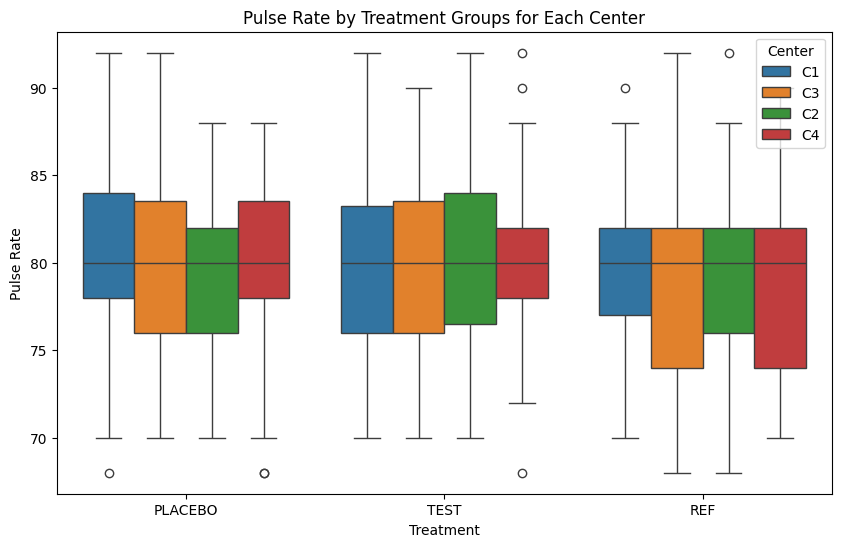

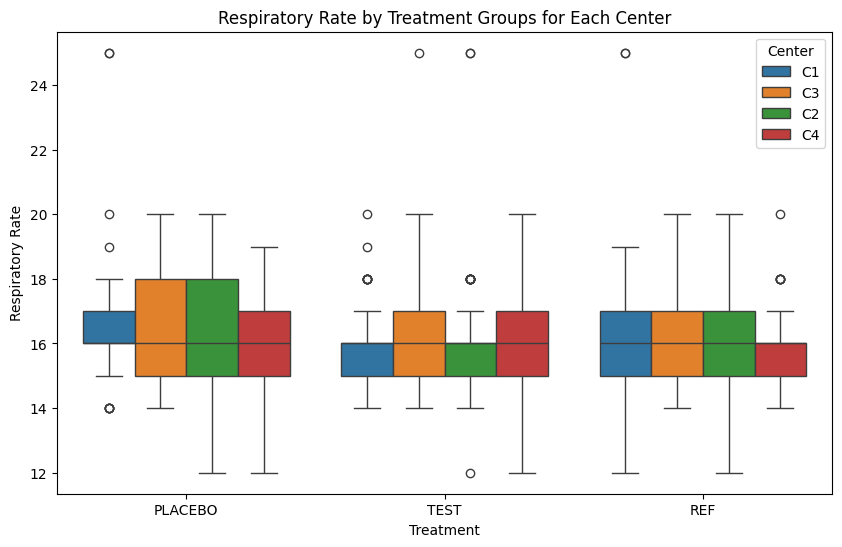

In [115]:
# Bar plot for average age by center and treatment
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='Age', hue='Center')
plt.title('Age Distribution by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.legend(title='Center')
plt.show()

# Pie chart for gender distribution across all centers and treatments
gender_counts = merged_data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%0.0f%%", colors=['pink', 'blue'])
plt.title('Gender Distribution Across All Treatment Groups')
plt.show()

# Bar plot for the most common work status by center and treatment
plt.figure(figsize=(12, 6))
sns.countplot(x='Center', hue='Work', data=merged_data)
plt.title('Most Common Work Status by Center')
plt.xlabel('Center')
plt.ylabel('Count')
plt.legend(title='Work Status')
plt.show()

# Bar plot for the most common surgery status by center and treatment
plt.figure(figsize=(12, 6))
sns.countplot(x='Center', hue='Surgery_1Y', data=merged_data)
plt.title('Most Common Surgery Status by Center')
plt.xlabel('Center')
plt.ylabel('Count')
plt.legend(title='Surgery in 1 Year')
plt.show()

# Pulse Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='PR', hue='Center')
plt.title('Pulse Rate by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Pulse Rate')
plt.legend(title='Center')
plt.show()

# Respiratory Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='RR', hue='Center')
plt.title('Respiratory Rate by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Respiratory Rate')
plt.legend(title='Center')
plt.show()

**Phase 2: Preliminary Analysis of VAS, AE, and Global Assessment**
1. VAS Analysis

   Treatment_  Day_  VAS_count   VAS_mean    VAS_std  VAS_median  VAS_min  \
0     PLACEBO  DAY1        272  64.555147  14.558594        66.0       22   
1     PLACEBO  DAY2        272  57.363971  14.177703        58.0       18   
2     PLACEBO  DAY3        272  49.022059  16.324643        51.0        0   
3     PLACEBO  DAY4        272  41.106618  15.079116        45.0        0   
4     PLACEBO  DAY5        272  35.216912  15.206840        36.5        0   
5     PLACEBO  DAY6        272  31.356618  17.269986        29.0        0   
6     PLACEBO  DAY7        272  28.000000  18.209523        26.0        0   
7         REF  DAY1        261  63.406130  16.751458        72.0       16   
8         REF  DAY2        261  46.735632  19.881259        48.0        0   
9         REF  DAY3        261  29.593870  21.475474        29.0        0   
10        REF  DAY4        261  21.823755  17.683314        24.0        0   
11        REF  DAY5        261  17.567050  15.756083        19.0        0   

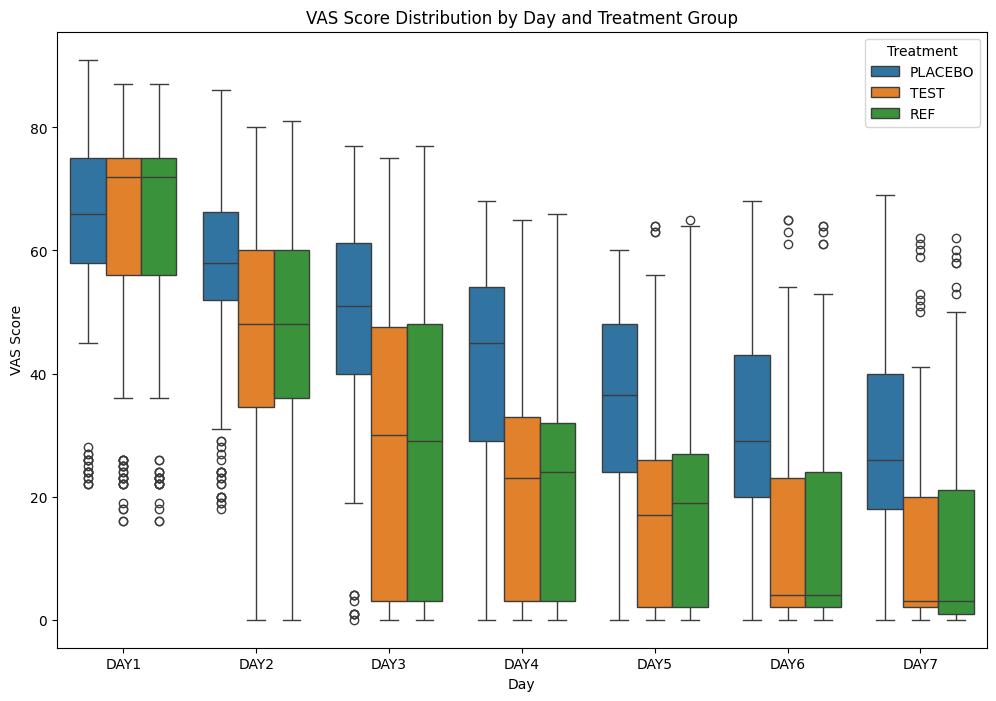

In [116]:
# Merge Randomization and VAS
vas_data = pd.merge(randomization, vas, on='Patient_ID', how='inner')

# Summarize VAS for each day
vas_summary = vas_data.groupby(['Treatment', 'Day']).agg({
    'VAS': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

# Flatten MultiIndex columns
vas_summary.columns = ['_'.join(col).strip() for col in vas_summary.columns.values]
print(vas_summary)

# Visualize VAS for each day
plt.figure(figsize=(12, 8))
sns.boxplot(x='Day', y='VAS', hue='Treatment', data=vas_data)
plt.title('VAS Score Distribution by Day and Treatment Group')
plt.xlabel('Day')
plt.ylabel('VAS Score')
plt.show()

   Treatment_  Day_  VAS_Change_count  VAS_Change_mean  VAS_Change_std  \
0     PLACEBO     2               272        -7.191176        5.566790   
1     PLACEBO     3               272       -15.533088        9.982587   
2     PLACEBO     4               272       -23.448529       12.128354   
3     PLACEBO     5               272       -29.338235       14.876972   
4     PLACEBO     6               272       -33.198529       18.098876   
5     PLACEBO     7               272       -36.555147       19.871838   
6         REF     2               261       -16.670498       16.378182   
7         REF     3               261       -33.812261       21.172896   
8         REF     4               261       -41.582375       20.572338   
9         REF     5               261       -45.839080       20.588201   
10        REF     6               261       -50.068966       21.255656   
11        REF     7               261       -52.295019       21.761848   
12       TEST     2               247 

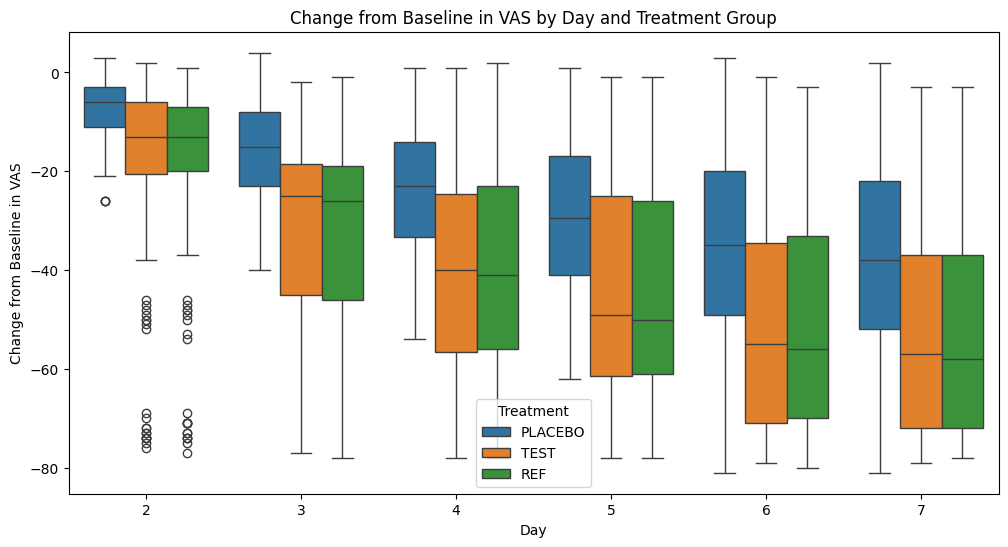

In [117]:
# Pivot VAS data

vas_pivot = vas_data.pivot(index='Patient_ID', columns='Day', values='VAS').reset_index()

# Ensure the columns have proper names (Day1, Day2, etc.)
vas_pivot.columns.name = None
vas_pivot.columns = ['Patient_ID', 'Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']

# Calculate change from baseline (Day 1)
baseline_col = 'Day1'
for day in ['Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']:
    vas_pivot[f'Change_{day}'] = vas_pivot[day] - vas_pivot[baseline_col]

# Melt the dataframe to long format for summary statistics
vas_melted = vas_pivot.melt(id_vars=['Patient_ID', baseline_col],
                            value_vars=[f'Change_{day}' for day in ['Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']],
                            var_name='Day', value_name='VAS_Change')

# Merge with randomization data for treatment groups
vas_change_data = pd.merge(randomization, vas_melted, on='Patient_ID', how='inner')

# Extract day number from 'Day' column for grouping
vas_change_data['Day'] = vas_change_data['Day'].str.extract('(\d+)').astype(int)

# Summary statistics of change from baseline
summary_stat_change = vas_change_data.groupby(['Treatment', 'Day']).agg({
    'VAS_Change': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

# Flatten the MultiIndex columns
summary_stat_change.columns = ['_'.join(col).strip() for col in summary_stat_change.columns.values]
print(summary_stat_change)

# Visualization of Change from Baseline in VAS by Day and Treatment Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=vas_change_data, x='Day', y='VAS_Change', hue='Treatment')
plt.title('Change from Baseline in VAS by Day and Treatment Group')
plt.xlabel('Day')
plt.ylabel('Change from Baseline in VAS')
plt.legend(title='Treatment')
plt.show()

**Global Assessment (PGA) and AE Analysis**

           count      mean       std  min  25%  50%  75%  max
Treatment                                                    
PLACEBO    272.0  0.937500  0.607267  0.0  1.0  1.0  1.0  4.0
REF        261.0  3.892720  0.333952  2.0  4.0  4.0  4.0  4.0
TEST       247.0  3.890688  0.312664  3.0  4.0  4.0  4.0  4.0


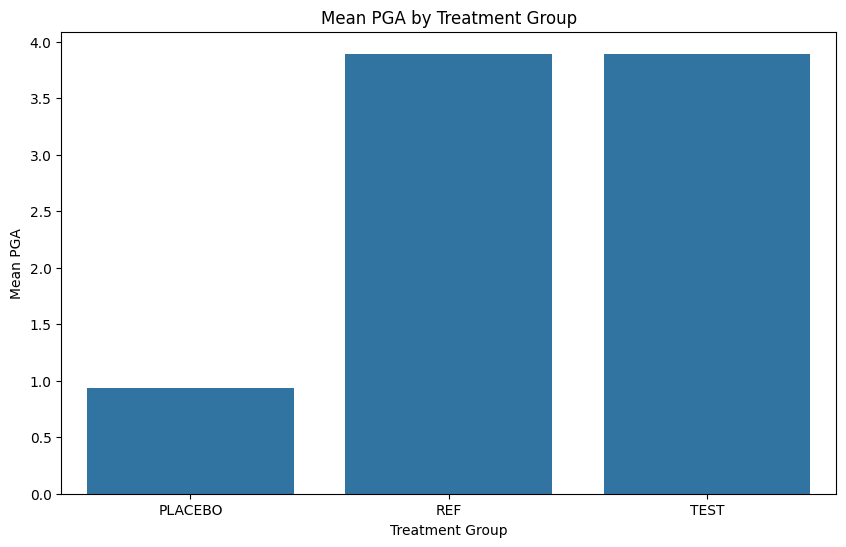

In [118]:
# Merge Randomization and Global Assessment datasets
global_assessment_data = pd.merge(randomization, global_assessment, on='Patient_ID')

# Summarize PGA by treatment group
pga_summary = global_assessment_data.groupby('Treatment')['PGA'].describe()
print(pga_summary)

# Visualize PGA by treatment group
plt.figure(figsize=(10, 6))
sns.barplot(x=pga_summary.index, y='mean', data=pga_summary.reset_index())
plt.title('Mean PGA by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Mean PGA')
plt.show()

  Treatment       AE_REL  count
0   PLACEBO  NOT RELATED     24
1       REF  NOT RELATED     22
2      TEST  NOT RELATED     22


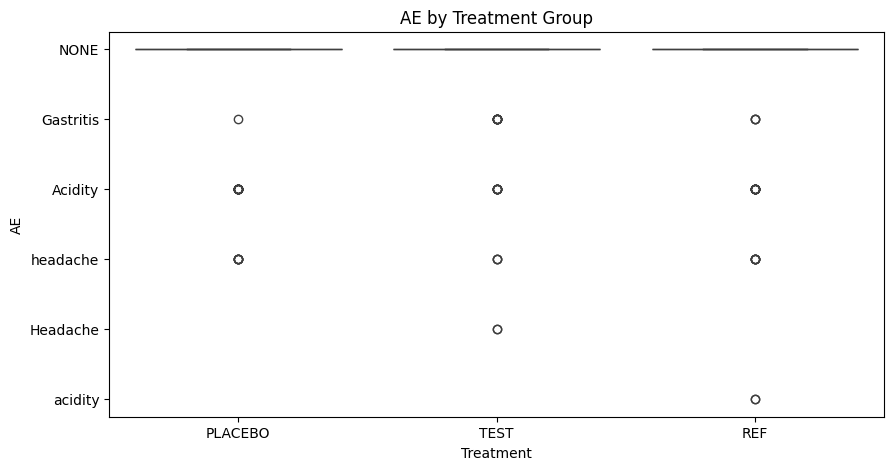

In [119]:
# Merge Randomization and AE datasets (assuming AE dataset includes treatment group info)
ae_data = pd.merge(randomization, ae, on='Patient_ID', how='inner')

ae_summary = ae_data.groupby(['Treatment', 'AE']).agg({
   'AE': 'count'
}).rename(columns={'AE': 'count'}).reset_index()


summary_ae_relation = ae_data.groupby(['Treatment', 'AE_REL']).agg({
   'AE_REL': 'count'
}).rename(columns={'AE_REL': 'count'}).reset_index()

print(summary_ae_relation)

# Visualization of AE by Treatment Group
plt.figure(figsize=(10, 5))
sns.boxplot(data=ae_data, x='Treatment', y='AE')
plt.title('AE by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('AE')
plt.show()

**Center-specific Trends in VAS Change**

   Treatment_  Day_  VAS_Change_count  VAS_Change_mean  VAS_Change_std  \
0     PLACEBO     2               272        -7.191176        5.566790   
1     PLACEBO     3               272       -15.533088        9.982587   
2     PLACEBO     4               272       -23.448529       12.128354   
3     PLACEBO     5               272       -29.338235       14.876972   
4     PLACEBO     6               272       -33.198529       18.098876   
5     PLACEBO     7               272       -36.555147       19.871838   
6         REF     2               261       -16.670498       16.378182   
7         REF     3               261       -33.812261       21.172896   
8         REF     4               261       -41.582375       20.572338   
9         REF     5               261       -45.839080       20.588201   
10        REF     6               261       -50.068966       21.255656   
11        REF     7               261       -52.295019       21.761848   
12       TEST     2               247 

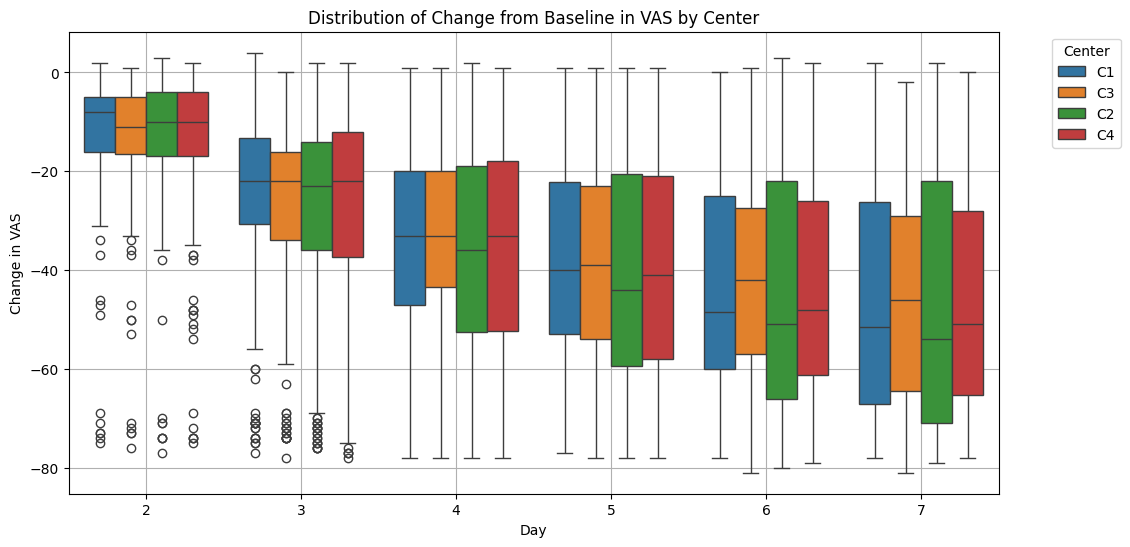

In [120]:
# Group by center and analyze change from baseline in VAS
center_vas_change = vas_change_data.groupby(['Treatment', 'Day']).agg({
    'VAS_Change': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

# Flatten the MultiIndex columns
center_vas_change.columns = ['_'.join(col).strip() for col in center_vas_change.columns.values]

print(center_vas_change)

# Visualize center-specific trends in VAS change
plt.figure(figsize=(12, 6))
sns.boxplot(data=vas_change_data, x='Day', y='VAS_Change', hue='Center')

plt.title('Distribution of Change from Baseline in VAS by Center')
plt.xlabel('Day')
plt.ylabel('Change in VAS')
plt.legend(title='Center', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [121]:
print(center_vas_change.columns)

Index(['Treatment_', 'Day_', 'VAS_Change_count', 'VAS_Change_mean',
       'VAS_Change_std', 'VAS_Change_median', 'VAS_Change_min',
       'VAS_Change_max'],
      dtype='object')


**Phase 3: Statistical Inference/Modeling**

In [122]:
merged_data = pd.merge(merged_data, vas_change_data, on='Patient_ID', how='inner')

print(merged_data.columns)

Index(['Patient_ID', 'Treatment_x', 'Center_x', 'ITT', 'PP', 'Age', 'Gender',
       'Work', 'Surgery_1Y', 'PR', 'Pulse rate (beats/min)', 'RR',
       'Respiratory rate (breaths/min)', 'SBP',
       'Systolic blood pressure (mmHg)', 'DBP',
       'Diastolic blood pressure (mmHg)', 'Treatment_y', 'Center_y', 'Day1',
       'Day', 'VAS_Change'],
      dtype='object')


In [123]:
def within_group_analysis(vas_data):
   results = {}
   treatments = vas_data['Treatment'].unique()


   for treatment in treatments:
       data_treatment = vas_data[vas_data['Treatment'] == treatment]
       day1_scores = data_treatment[data_treatment['Day'] == 'DAY1']['VAS']
       day7_scores = data_treatment[data_treatment['Day'] == 'DAY7']['VAS']

       # Check for normality
       if len(day1_scores) >= 3 and len(day7_scores) >= 3:
           shapiro_day1 = shapiro(day1_scores)
           shapiro_day7 = shapiro(day7_scores)
           print(f"Shapiro-Wilk test for {treatment} Day 1: {shapiro_day1}")
           print(f"Shapiro-Wilk test for {treatment} Day 7: {shapiro_day7}")


           # If both are normally distributed, use paired t-test; otherwise, use Wilcoxon signed-rank test
           if shapiro_day1.pvalue > 0.05 and shapiro_day7.pvalue > 0.05:
               test_stat, p_value = ttest_rel(day1_scores, day7_scores)
               test_name = "Paired t-test"
           else:
               test_stat, p_value = wilcoxon(day1_scores, day7_scores)
               test_name = "Wilcoxon signed-rank test"

           results[treatment] = (test_name, test_stat, p_value)
       else:
           print(f"Not enough data points for normality test in treatment {treatment}")

   return results


# Run the within-group analysis
within_group_results = within_group_analysis(vas_data)

Shapiro-Wilk test for PLACEBO Day 1: ShapiroResult(statistic=0.915044903755188, pvalue=2.6374468581336075e-11)
Shapiro-Wilk test for PLACEBO Day 7: ShapiroResult(statistic=0.9563689231872559, pvalue=2.775701091195515e-07)
Shapiro-Wilk test for TEST Day 1: ShapiroResult(statistic=0.8402628302574158, pvalue=3.030693837913017e-15)
Shapiro-Wilk test for TEST Day 7: ShapiroResult(statistic=0.7510339617729187, pvalue=5.024246960773985e-19)
Shapiro-Wilk test for REF Day 1: ShapiroResult(statistic=0.8563741445541382, pvalue=7.40861009557647e-15)
Shapiro-Wilk test for REF Day 7: ShapiroResult(statistic=0.7625945210456848, pvalue=3.9709999547617467e-19)


Based on the Shapiro-Wilk test results, we see that all p-values are less than 0.05, indicating that the VAS scores for Day 1 and Day 7 are not normally distributed for all treatment groups. Therefore, we should use the Wilcoxon signed-rank test for comparing Day 1 and Day 7 VAS scores within each treatment group.

In [124]:
def perform_wilcoxon_test(vas_data):
   results = {}
   treatments = vas_data['Treatment'].unique()


   for treatment in treatments:
       data_treatment = vas_data[vas_data['Treatment'] == treatment]
       day1_scores = data_treatment[data_treatment['Day'] == 'DAY1']['VAS']
       day7_scores = data_treatment[data_treatment['Day'] == 'DAY7']['VAS']

       if len(day1_scores) >= 3 and len(day7_scores) >= 3:
           # Perform Wilcoxon signed-rank test
           test_stat, p_value = wilcoxon(day1_scores, day7_scores)
           results[treatment] = ("Wilcoxon signed-rank test", test_stat, p_value)
       else:
           results[treatment] = ("Not enough data points", None, None)

   return results


# Run the Wilcoxon signed-rank test for each treatment group
wilcoxon_results = perform_wilcoxon_test(vas_data)
print("Wilcoxon Signed-Rank Test Results:")
for treatment, result in wilcoxon_results.items():
   print(f"{treatment}: Test: {result[0]}, Test Statistic: {result[1]}, p-value: {result[2]}")

Wilcoxon Signed-Rank Test Results:
PLACEBO: Test: Wilcoxon signed-rank test, Test Statistic: 18.0, p-value: 5.9512005937232835e-46
TEST: Test: Wilcoxon signed-rank test, Test Statistic: 0.0, p-value: 2.7850460774084208e-42
REF: Test: Wilcoxon signed-rank test, Test Statistic: 0.0, p-value: 1.4222648916306946e-44


In [125]:
merged_data.columns

Index(['Patient_ID', 'Treatment_x', 'Center_x', 'ITT', 'PP', 'Age', 'Gender',
       'Work', 'Surgery_1Y', 'PR', 'Pulse rate (beats/min)', 'RR',
       'Respiratory rate (breaths/min)', 'SBP',
       'Systolic blood pressure (mmHg)', 'DBP',
       'Diastolic blood pressure (mmHg)', 'Treatment_y', 'Center_y', 'Day1',
       'Day', 'VAS_Change'],
      dtype='object')

In [126]:
# Selecting the necessary columns for the model
X = merged_data[['Treatment_x', 'Day1', 'Age', 'Gender', 'Center_x']]
y = merged_data['VAS_Change']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [127]:
# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to integers
X = X.astype(int)

# Ensure y is numeric
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with NaN values that resulted from the conversion
X = X.dropna()
y = y.loc[X.index]

# Fit the OLS model
def fit_ols_model(X, y):
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X).fit()
    return model

# Fit the model and print the R-squared values
model = fit_ols_model(X, y)
print("Overall R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)
print(model.summary())

Overall R-squared: 0.2901830938630844
Adjusted R-squared: 0.28896739374553027
                            OLS Regression Results                            
Dep. Variable:             VAS_Change   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     238.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:39:02   Log-Likelihood:                -20509.
No. Observations:                4680   AIC:                         4.104e+04
Df Residuals:                    4671   BIC:                         4.109e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [128]:
# Get the residuals from the model
residuals = model.resid

# Calculate standard deviation of residuals
std_dev = np.std(residuals)

# Identify outliers using a standard deviation based approach (e.g., considering residuals more than 2 standard deviations away)
outliers = residuals[abs(residuals) > 2 * std_dev]

# Print outliers (if any)
print("Outliers based on residuals:")
print(outliers)

Outliers based on residuals:
6       41.511948
96      46.503545
102     46.923469
168     44.109131
186     41.012193
          ...    
4464    43.310077
4488    40.343534
4530    43.870912
4589   -38.971540
4614    39.672730
Length: 120, dtype: float64


In [129]:
merged_data = pd.merge(merged_data, vas_change_data, on='Patient_ID', how='inner')

merged_data.columns

Index(['Patient_ID', 'Treatment_x', 'Center_x', 'ITT', 'PP', 'Age', 'Gender',
       'Work', 'Surgery_1Y', 'PR', 'Pulse rate (beats/min)', 'RR',
       'Respiratory rate (breaths/min)', 'SBP',
       'Systolic blood pressure (mmHg)', 'DBP',
       'Diastolic blood pressure (mmHg)', 'Treatment_y', 'Center_y', 'Day1_x',
       'Day_x', 'VAS_Change_x', 'Treatment', 'Center', 'Day1_y', 'Day_y',
       'VAS_Change_y'],
      dtype='object')

In [130]:
# Calculate percentage change in VAS from Day 1 to Day 7
merged_data['Percent_Change'] = (merged_data['VAS_Change_y'] - merged_data['VAS_Change_x']) / merged_data['VAS_Change_x'] * 100

# Define Percent_Change75 based on the condition
merged_data['Percent_Change75'] = np.where(merged_data['Percent_Change'] > 75, 1, 0)
merged_data['Percent_Change75']

0        0
1        0
2        1
3        1
4        1
        ..
28075    0
28076    0
28077    0
28078    0
28079    0
Name: Percent_Change75, Length: 28080, dtype: int64

In [131]:
merged_data = merged_data.dropna()

In [132]:
merged_data.columns

Index(['Patient_ID', 'Treatment_x', 'Center_x', 'ITT', 'PP', 'Age', 'Gender',
       'Work', 'Surgery_1Y', 'PR', 'Pulse rate (beats/min)', 'RR',
       'Respiratory rate (breaths/min)', 'SBP',
       'Systolic blood pressure (mmHg)', 'DBP',
       'Diastolic blood pressure (mmHg)', 'Treatment_y', 'Center_y', 'Day1_x',
       'Day_x', 'VAS_Change_x', 'Treatment', 'Center', 'Day1_y', 'Day_y',
       'VAS_Change_y', 'Percent_Change', 'Percent_Change75'],
      dtype='object')

In [135]:
# Select relevant columns for X_logit
X_logit = merged_data[['Age', 'Gender', 'Center_y', 'Treatment_y']].copy()

# Convert categorical variables to dummy variables
X_logit = pd.get_dummies(X_logit, columns=['Gender', 'Center_y', 'Treatment_y'], drop_first=True)

# Ensure all data is float
X_logit = X_logit.astype(float)

# Define the dependent variable y_logit
y_logit = merged_data['Percent_Change75'].astype(float)

# Add intercept to the model
X_logit = sm.add_constant(X_logit)

In [136]:
# Fit the logistic regression model
logit_model = sm.Logit(y_logit, X_logit).fit()

# Print model summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.451763
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Percent_Change75   No. Observations:                28031
Model:                          Logit   Df Residuals:                    28023
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                0.005175
Time:                        17:46:31   Log-Likelihood:                -12663.
converged:                       True   LL-Null:                       -12729.
Covariance Type:            nonrobust   LLR p-value:                 2.705e-25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3195      0.065    -20.266      0.000      -1.447      -1.192
Age        

In [138]:
merged_assessment_data = pd.merge(merged_data, global_assessment, on='Patient_ID')
merged_assessment_data.columns

Index(['Patient_ID', 'Treatment_x', 'Center_x', 'ITT', 'PP', 'Age', 'Gender',
       'Work', 'Surgery_1Y', 'PR', 'Pulse rate (beats/min)', 'RR',
       'Respiratory rate (breaths/min)', 'SBP',
       'Systolic blood pressure (mmHg)', 'DBP',
       'Diastolic blood pressure (mmHg)', 'Treatment_y', 'Center_y', 'Day1_x',
       'Day_x', 'VAS_Change_x', 'Treatment', 'Center', 'Day1_y', 'Day_y',
       'VAS_Change_y', 'Percent_Change', 'Percent_Change75', 'PGA'],
      dtype='object')

In [142]:
# Subset the data based on treatment groups
test_data = merged_assessment_data[merged_assessment_data['Treatment_x'] == 'TEST']['PGA']
ref_data = merged_assessment_data[merged_assessment_data['Treatment_x'] == 'REF']['PGA']
placebo_data = merged_assessment_data[merged_assessment_data['Treatment_x'] == 'PLACEBO']['PGA']

# Perform ANOVA test
f_statistic, p_value = f_oneway(test_data, ref_data, placebo_data)

# Output the ANOVA test results
print("ANOVA Test Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Test Results:
F-statistic: 141796.26177600774
P-value: 0.0


**Phase4**

In [150]:
# Selecting relevant columns
columns = ['Treatment_x', 'Day1_x', 'Age', 'Gender', 'Center_x', 'VAS_Change_x']
data_step1 = merged_assessment_data[columns].copy()

# Encode categorical variables
data_step1 = pd.get_dummies(data_step1, columns=['Treatment_x', 'Gender', 'Center_x'], drop_first=True)

# Separate X and y
X_step1 = data_step1.drop('VAS_Change_x', axis=1)
y_step1 = data_step1['VAS_Change_x']  # Assuming 'VAS_Change_x' is already 0/1 or binary

# Build the decision tree model
tree_model_step1 = DecisionTreeClassifier(random_state=42)
tree_model_step1.fit(X_step1, y_step1)

DecisionTreeClassifier(random_state=42)

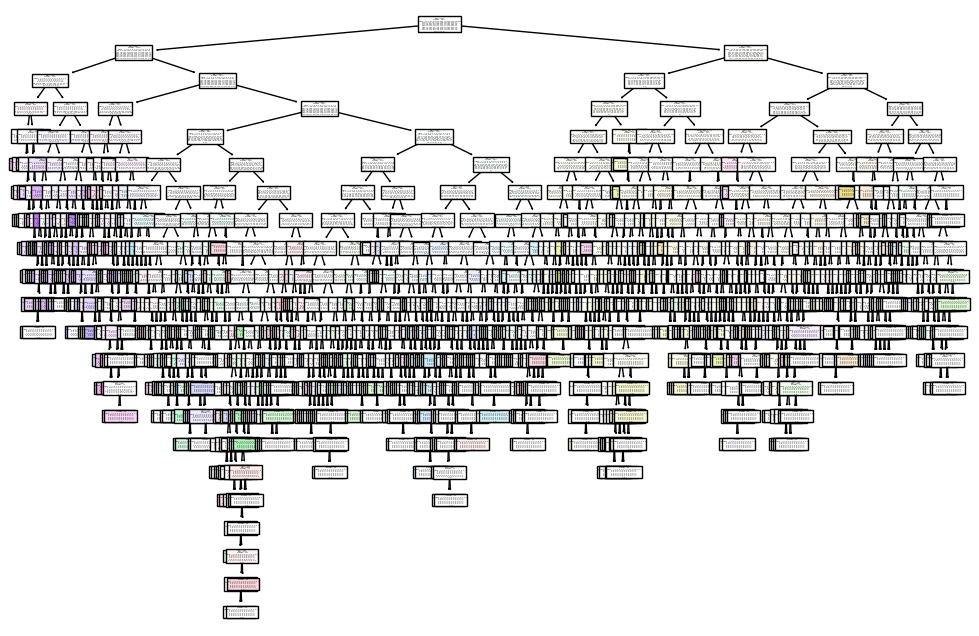

In [152]:
# Visualize the decision tree

from sklearn.tree import plot_tree
plt.figure(figsize = (12,8))
plot_tree(tree_model_step1, filled = True, feature_names = list(X.columns))
plt.show();

In [159]:
# Calculate percentage change
merged_assessment_data['Percent_Change'] = ((merged_assessment_data['Day_y'] - merged_assessment_data['Day1_x']) / merged_assessment_data['Day1_x']) * 100

# Define Percent_Change75
merged_assessment_data['Percent_Change75'] = (merged_assessment_data['Percent_Change'] > 75).astype(int)

# Check the distribution of Percent_Change75
print(merged_assessment_data['Percent_Change75'].value_counts())

Percent_Change75
0    28031
Name: count, dtype: int64


In [160]:
# Selecting relevant columns
columns = ['Treatment_x', 'Day1_x', 'Age', 'Gender', 'Center_x', 'Percent_Change75']
data_step3 = merged_assessment_data[columns].copy()

# Encode categorical variables
data_step3 = pd.get_dummies(data_step3, columns=['Treatment_x', 'Gender', 'Center_x'], drop_first=True)

# Separate X and y
X_step3 = data_step3.drop('Percent_Change75', axis=1)
y_step3 = data_step3['Percent_Change75']

# Build the decision tree model
tree_model_step3 = DecisionTreeClassifier(random_state=42)
tree_model_step3.fit(X_step3, y_step3)


DecisionTreeClassifier(random_state=42)

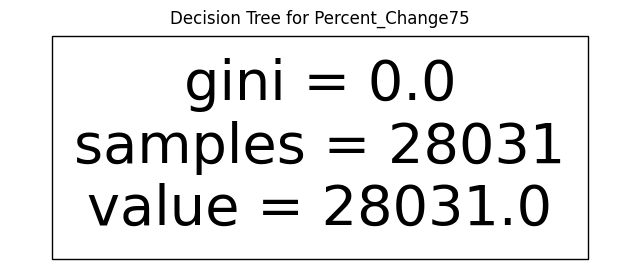

In [162]:
# Visualize the decision tree
plt.figure(figsize=(8, 3))
plot_tree(tree_model_step3, feature_names=X_step3.columns, class_names=['Not > 75%', '> 75%'], filled=True)
plt.title("Decision Tree for Percent_Change75")
plt.show()